In [25]:

# If you run this notebook separately, uncomment this line
%run AnalysisFunctions.ipynb
apply_filter = "False"

C:\Users\hamda\AppData\Local\Temp\ipykernel_5372\1198573690.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ground_truth_depmap_hit = ground_truth_depmap_hit.replace({True: 1, False: 0})


In [4]:
print("Running Dede Analysis")


print(f"Apply Filter?: {apply_filter}")

if apply_filter.lower() == "true":
    filtered = "/Filtered"
    print("Compiling results with filtered pairs")
else:
    filtered = ""
    print("Compiling results with unfiltered pairs")

Running Dede Analysis
Apply Filter?: False
Compiling results with unfiltered pairs


In [5]:
# zdLFC does not filter out anything so filtered = unfiltered
zdLFC = pd.read_csv("../zdLFC Scripts/zdLFC Output/DeDe_zdLFC.csv")

zdLFC = zdLFC.rename(columns={zdLFC.columns[0]: 'GENE'})

zdLFC = zdLFC.set_index('GENE')
zdLFC
zdLFC = reindex_alphbetically(zdLFC)
zdLFC = -1 * zdLFC
zdLFC


,A549,HT29,OVCAR8
gene_pair,,,
ABHD4_ABHD5,0.607016,0.037011,0.048302
ABL1_ABL2,-0.087697,-0.886663,-0.080356
ABR_BCR,-1.883471,-0.778018,-1.044274
ACAP2_ACAP3,-2.692670,-1.999119,-2.080933
ACTG1_ACTR1B,-0.946709,-3.524901,-4.763899
...,...,...,...
ZNF619_ZNF620,-0.285157,0.102048,-0.170539
ZNF747_ZNF764,-1.462064,-0.714486,-0.929625
ZNF764_ZNF785,-0.521223,-0.533311,-0.623892


In [6]:
orthrus = pd.read_csv("../Orthrus Scripts/OrthrusOutput" + filtered + "/dede_orthrus.tsv", sep='\t')
orthrus['GENE'] = orthrus['gene1'] + "_" + orthrus['gene2']

orthrus =  orthrus[['GENE','differential_combn_vs_single_A549', 'differential_combn_vs_single_HT29',  'differential_combn_vs_single_OVCAR8']]
orthrus = orthrus.rename(columns={'differential_combn_vs_single_A549': 'A549', 'differential_combn_vs_single_HT29': 'HT29', 'differential_combn_vs_single_OVCAR8': 'OVCAR8'})
orthrus = orthrus.set_index('GENE')
orthrus = reindex_alphbetically(orthrus)
orthrus = orthrus * -1
orthrus


,A549,HT29,OVCAR8
gene_pair,,,
ABHD4_ABHD5,0.116586,-0.029831,-0.016961
ABL1_ABL2,-0.164048,-0.297395,-0.087768
ABR_BCR,-0.541157,-0.287194,-0.455757
ACAP2_ACAP3,-0.897770,-0.531842,-0.633400
ACTG1_ACTR1B,-0.189304,-0.434630,-0.298946
...,...,...,...
ZNF619_ZNF620,-0.219141,-0.080111,-0.158577
ZNF747_ZNF764,-0.466859,-0.081524,-0.202659
ZNF764_ZNF785,-0.119512,-0.218738,-0.267327


In [7]:
gemini_sens = pd.read_csv("../Gemini Scripts/GeminiOutput" + filtered + "/Gemini_Dede_Sensitive_Lethality.csv")
gemini_sens = gemini_sens.rename(columns={gemini_sens.columns[0]: 'gene_pair'})
gemini_sens['gene_pair'] = gemini_sens['gene_pair'].str.replace(';', '_')
gemini_sens = gemini_sens.set_index('gene_pair')
gemini_sens = reindex_alphbetically(gemini_sens)


In [8]:
gemini_strong = pd.read_csv("../Gemini Scripts/GeminiOutput" + filtered + "/Gemini_Dede_Strong.csv")
gemini_strong = gemini_strong.rename(columns={gemini_strong.columns[0]: 'gene_pair'})
gemini_strong['gene_pair'] = gemini_strong['gene_pair'].str.replace(';', '_')
gemini_strong = gemini_strong.set_index('gene_pair')
gemini_strong = reindex_alphbetically(gemini_strong)


In [9]:
# load the latest parrish 
# Parrish also does not filter out any pairs so didnt run it by remnoving filtering steps
parrish = pd.read_csv('../Parrish Score Scripts/ParrishOutput/Dede_Parrish.csv')
parrish.set_index('paralog_pair', inplace = True)

parrish = reindex_alphbetically(parrish)
parrish = parrish * -1
parrish

,GI_score_A549,GI_score_HT29,GI_score_OVCAR8,fdr_A549,fdr_HT29,fdr_OVCAR8,p_val_A549,p_val_HT29,p_val_OVCAR8
gene_pair,,,,,,,,,
ABHD4_ABHD5,0.353219,0.384606,0.132165,-0.119263,-0.062513,-0.561874,-0.060667,-0.040797,-0.443365
ABL1_ABL2,0.020276,0.152444,-0.044935,-0.820584,-0.062550,-0.640557,-0.753390,-0.040976,-0.522936
ABR_BCR,-0.304671,0.073583,-0.270024,-0.337890,-0.787841,-0.111366,-0.243985,-0.768291,-0.056926
ACAP2_ACAP3,-0.812392,-0.279208,-0.528652,-0.000023,-0.006011,-0.000145,-0.000001,-0.002816,-0.000018
ACTG1_ACTR1B,0.167493,-0.074461,-0.518137,-0.589360,-0.766604,-0.012688,-0.492840,-0.736463,-0.003967
...,...,...,...,...,...,...,...,...,...
ZNF619_ZNF620,0.008060,0.417546,0.117245,-0.965713,-0.001992,-0.453141,-0.956128,-0.000756,-0.337326
ZNF747_ZNF764,-0.489447,0.314784,-0.069083,-0.090231,-0.125714,-0.619525,-0.040308,-0.090853,-0.498080
ZNF764_ZNF785,0.151063,0.246760,-0.041475,-0.480242,-0.017081,-0.646055,-0.376567,-0.009536,-0.529028


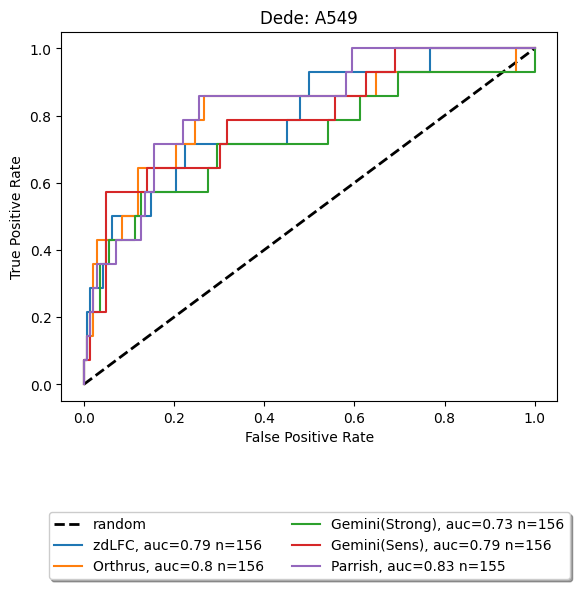

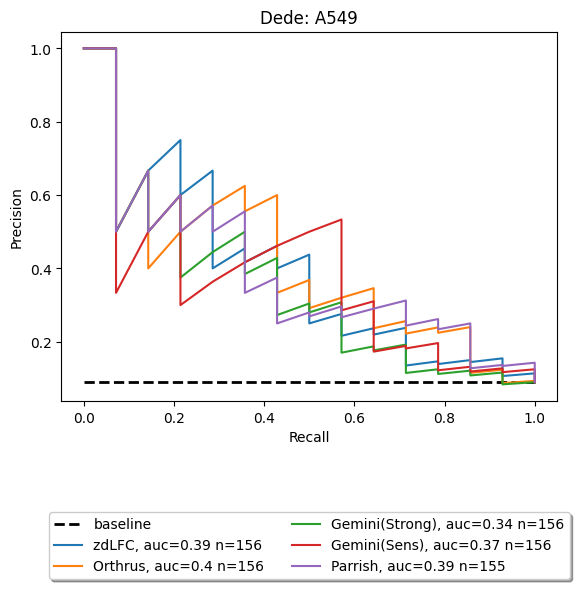

In [10]:
Dede_A549 = pd.concat([zdLFC['A549'], orthrus['A549'],  gemini_strong['A549'],gemini_sens['A549'], parrish['GI_score_A549']], axis = 1,
                     keys= scores)

results_Dede_A549 = Cell_Line_Analysis(Dede_A549, 'A549', 'Dede', scores, ground_truth_depmap_hit)



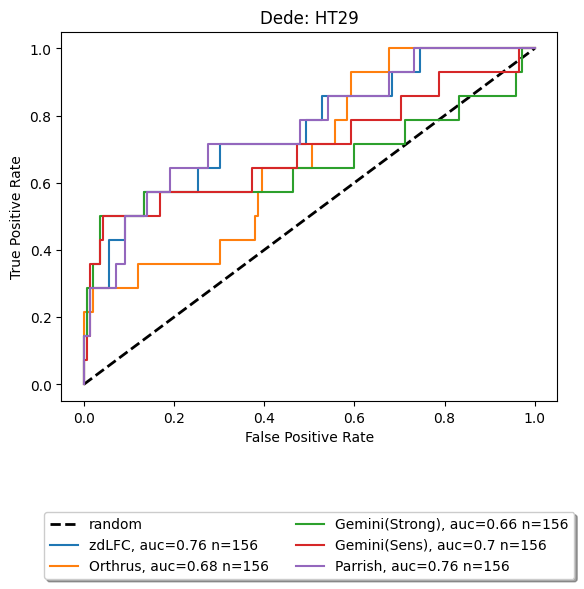

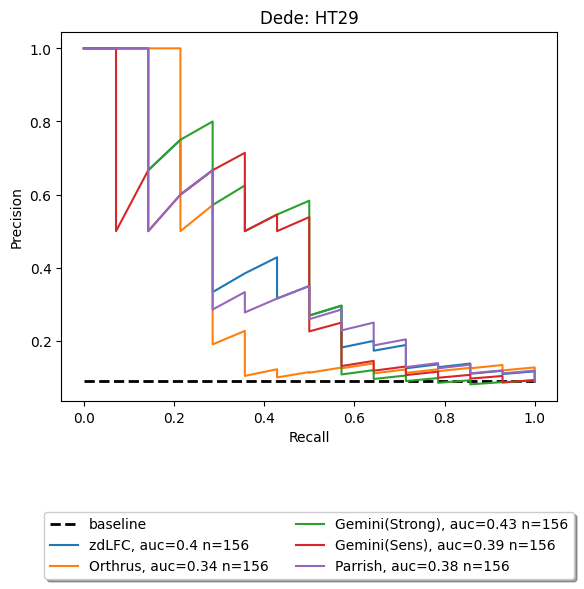

In [11]:
Dede_HT29 = pd.concat([zdLFC['HT29'], orthrus['HT29'], gemini_strong['HT29'], gemini_sens['HT29'], parrish['GI_score_HT29']], axis = 1,
                     keys=scores)

results_Dede_HT29 = Cell_Line_Analysis(Dede_HT29, 'HT29', 'Dede', scores, ground_truth_depmap_hit)



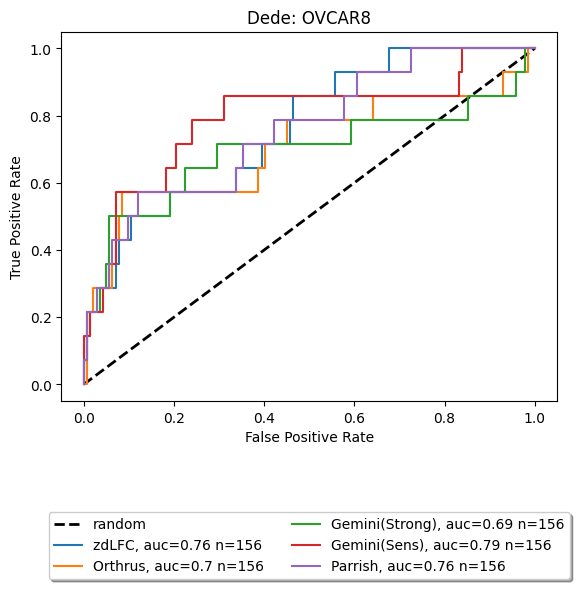

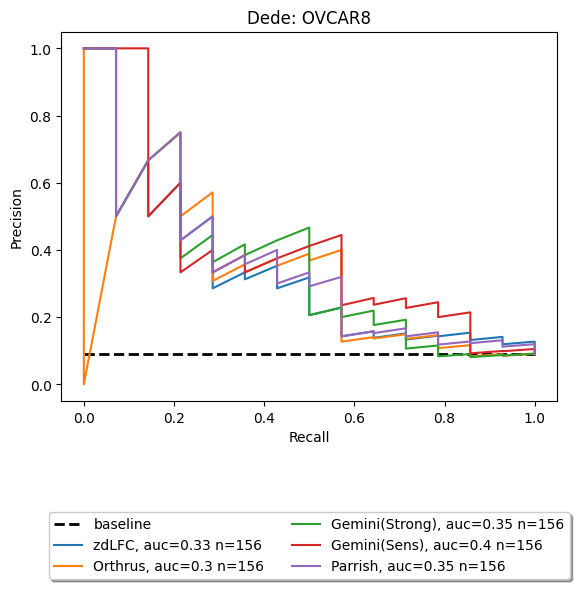

In [12]:
Dede_OVCAR8 = pd.concat([zdLFC['OVCAR8'], orthrus['OVCAR8'], gemini_strong['OVCAR8'], gemini_sens['OVCAR8'], parrish['GI_score_OVCAR8']], axis = 1,
                     keys=scores)

results_Dede_OVCAR8 = Cell_Line_Analysis(Dede_OVCAR8, 'OVCAR8', 'Dede', scores,ground_truth_depmap_hit)



In [13]:
full_list = [results_Dede_A549, results_Dede_HT29, results_Dede_OVCAR8]
roc, pr = ConvertResultsToDF(full_list)

In [14]:
## Write results to a file
roc.to_csv("Output" + filtered + "/Dede_ROC_DepMapHits.csv", index=False)
pr.to_csv("Output" + filtered + "/Dede_PR_DepMapHits.csv", index=False)


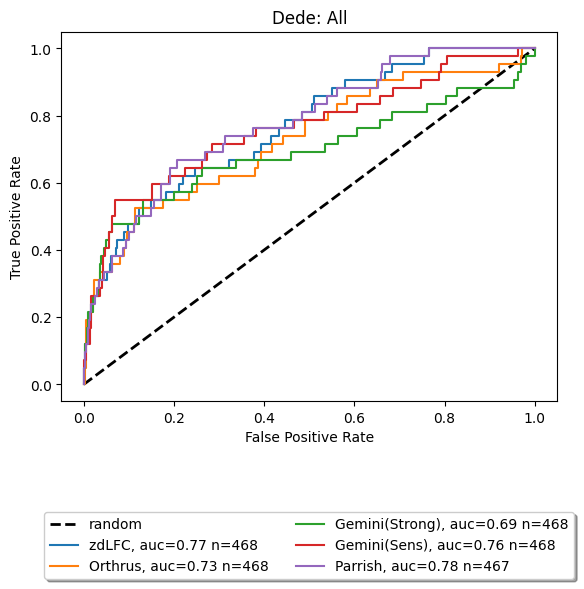

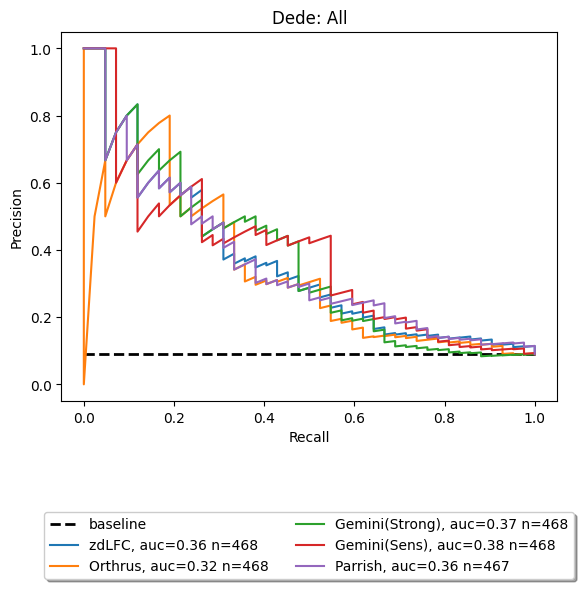

In [15]:
# combine all cell lines and then repeat analysis
dede_all = pd.concat([Dede_A549, Dede_OVCAR8,Dede_HT29])
dede_all
results_Dede_All = Cell_Line_Analysis(dede_all, 'All', 'Dede', scores, ground_truth_depmap_hit)


roc_all, pr_all = ConvertResultsToDF([results_Dede_All] )


In [16]:
dede_all.corr(method = "spearman").to_csv("Output" + filtered + "/Dede_Correlation.csv")

In [17]:
## Write results to a file
roc_all.to_csv("Output" + filtered + "/Dede_All_ROC_DepMapHits.csv", index=False)
pr_all.to_csv("Output" + filtered + "/Dede_All_PR_DepMapHits.csv", index=False)


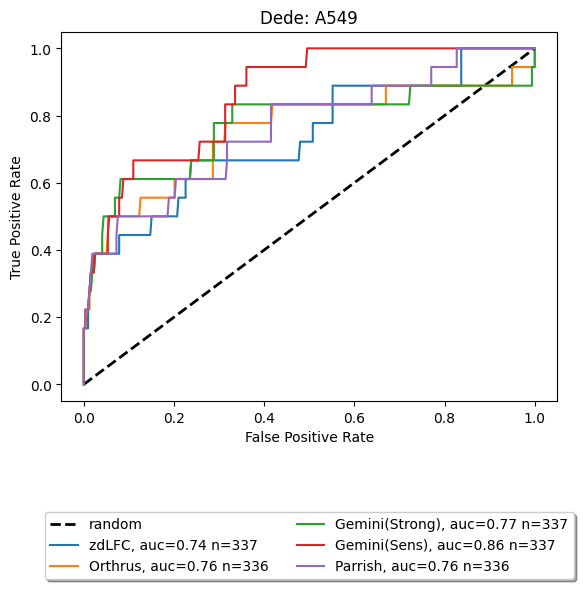

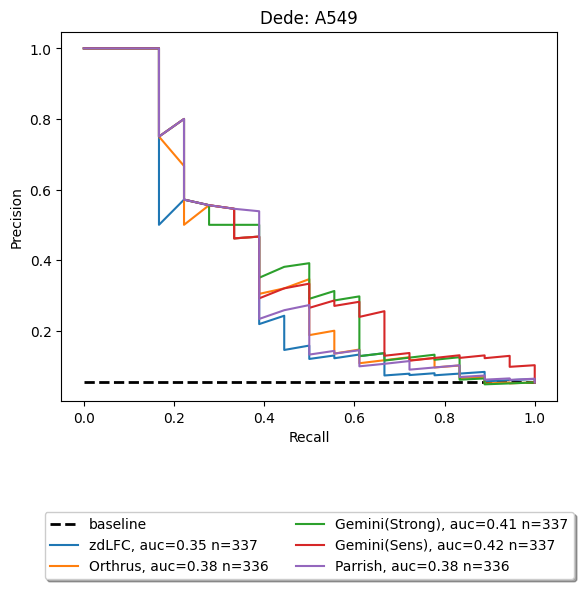

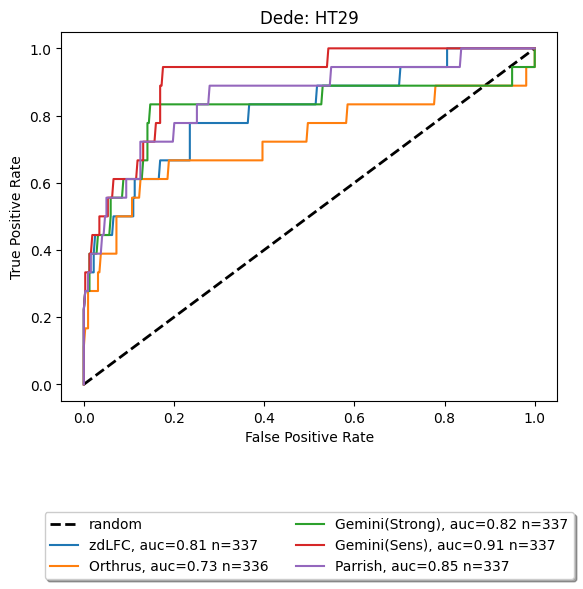

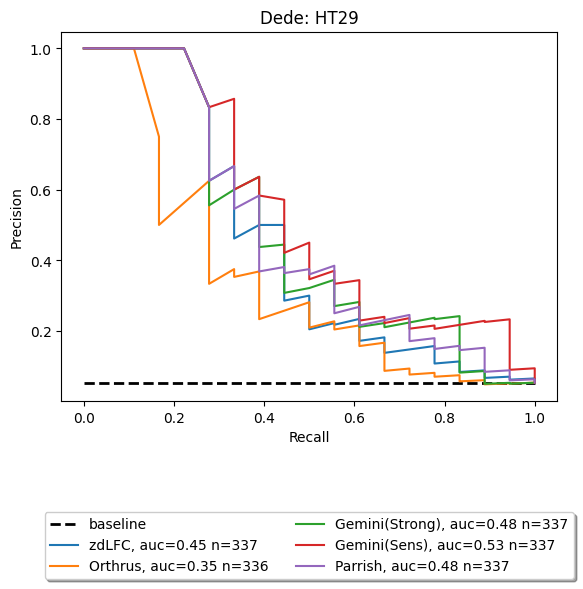

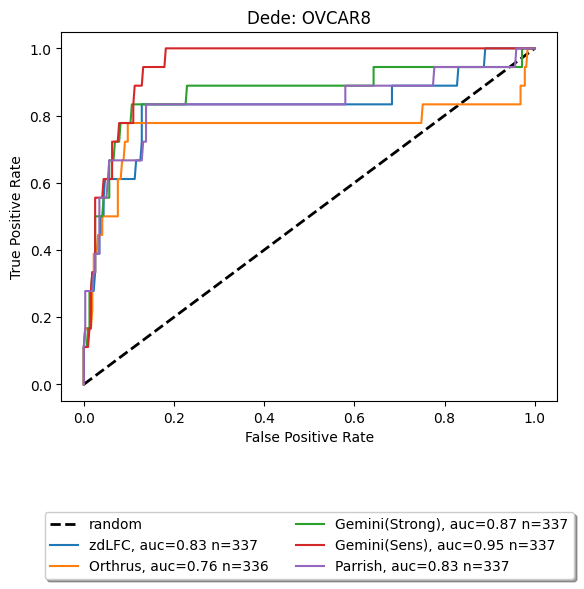

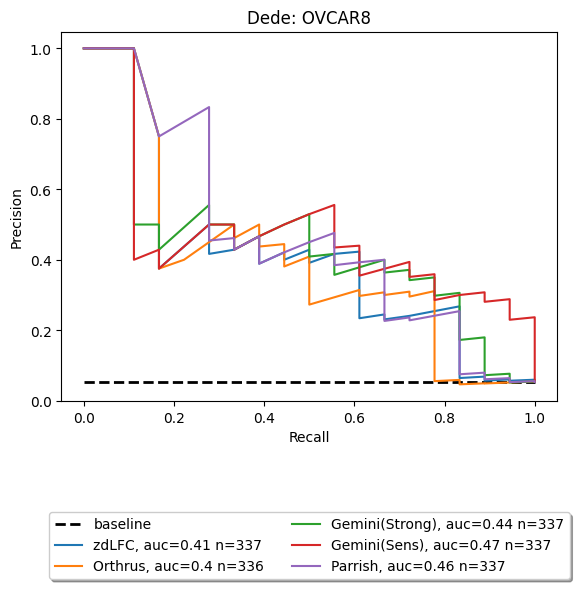

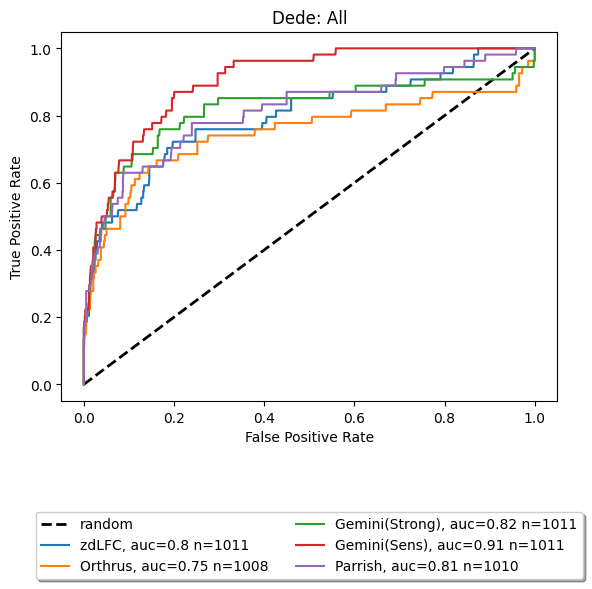

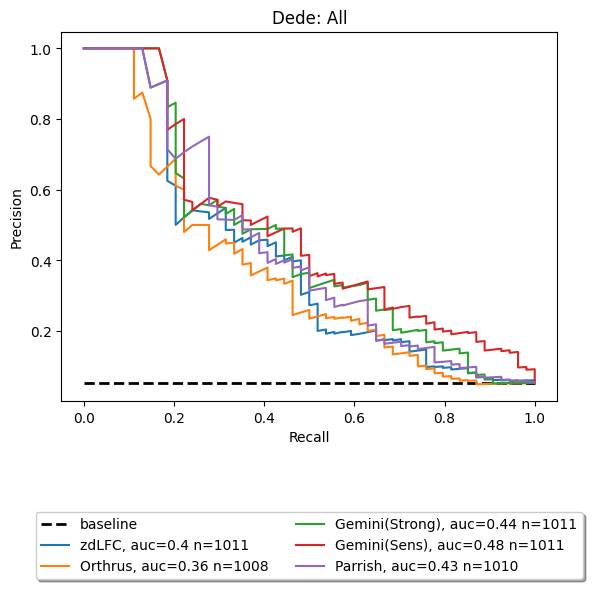

In [18]:
 ##### NOW USE GROUND TRUTH KORLEFE 1  #######

results_Dede_A549_korlefe =Cell_Line_Analysis(Dede_A549, 'A549', 'Dede', scores, Koferle)
results_Dede_HT29_korlefe =Cell_Line_Analysis(Dede_HT29, 'HT29', 'Dede', scores, Koferle)
results_Dede_OVCAR8_korlefe =Cell_Line_Analysis(Dede_OVCAR8, 'OVCAR8', 'Dede', scores, Koferle)

full_list_Koferle = [results_Dede_A549_korlefe, results_Dede_HT29_korlefe,results_Dede_OVCAR8_korlefe ]
roc_Koferle, pr_Koferle = ConvertResultsToDF(full_list_Koferle )


roc_Koferle.to_csv("Output" + filtered + "/Dede_ROC_Koferle.csv", index=False)
pr_Koferle.to_csv("Output" + filtered + "/Dede_PR_Koferle.csv", index=False)


results_Dede_all_Koferle = Cell_Line_Analysis(dede_all, 'All', 'Dede', scores, Koferle)

roc_all_Koferle, pr_all_Koferle = ConvertResultsToDF([results_Dede_all_Koferle] )

roc_all_Koferle.to_csv("Output" + filtered + "/Dede_All_ROC_Koferle.csv", index=False)
pr_all_Koferle.to_csv("Output" + filtered + "/Dede_All_PR_Koferle.csv", index=False)


In [19]:
roc_Koferle

,value,Score,Common samples,Positive Samples,Cell line,Study name
0,0.737809,zdLFC,337,18.0,A549,Dede
1,0.755154,Orthrus,336,18.0,A549,Dede
2,0.769854,Gemini(Strong),337,18.0,A549,Dede
3,0.860763,Gemini(Sens),337,18.0,A549,Dede
4,0.762142,Parrish,336,18.0,A549,Dede
5,0.812870,zdLFC,337,18.0,HT29,Dede
6,0.728599,Orthrus,336,18.0,HT29,Dede
7,0.816876,Gemini(Strong),337,18.0,HT29,Dede
8,0.908481,Gemini(Sens),337,18.0,HT29,Dede
9,0.854667,Parrish,337,18.0,HT29,Dede


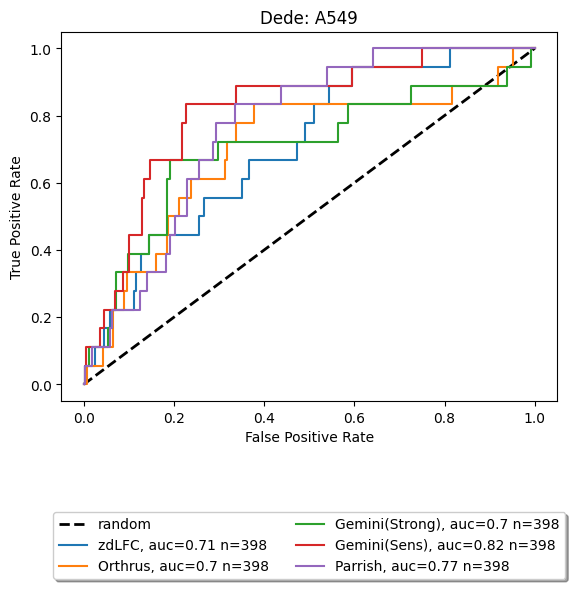

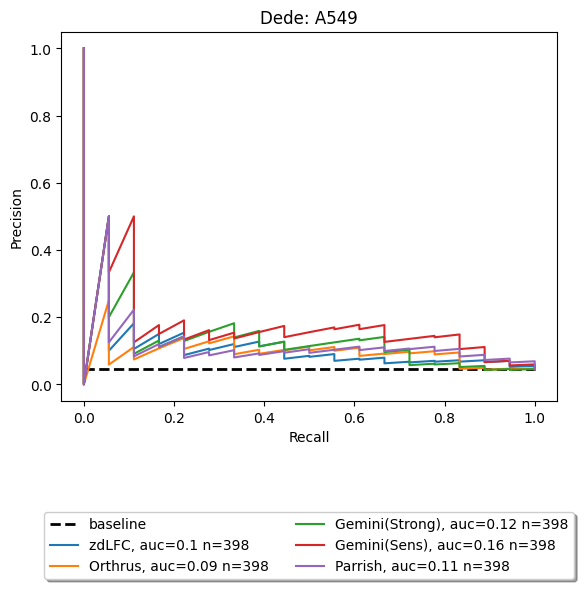

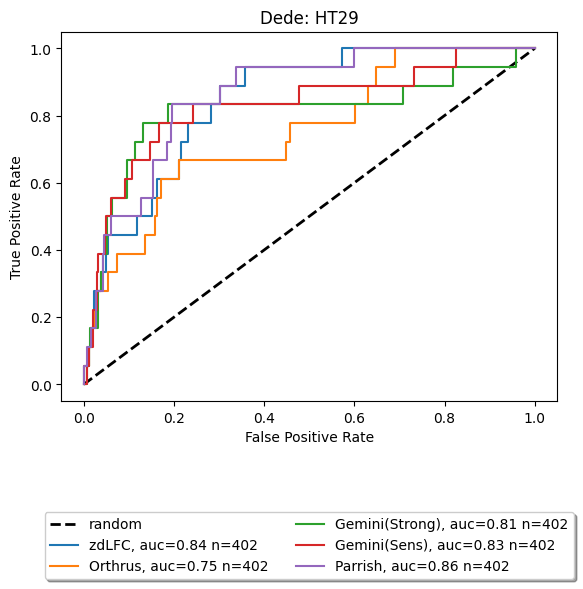

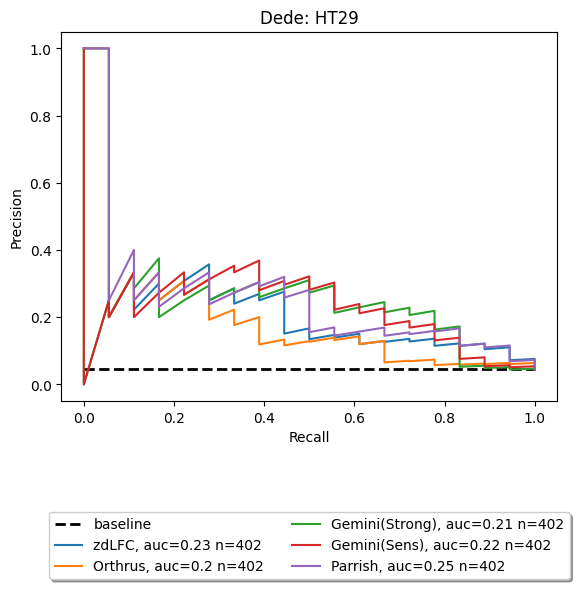

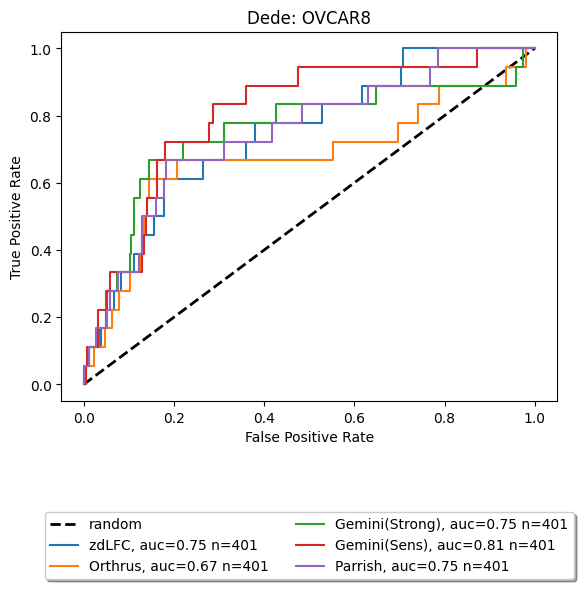

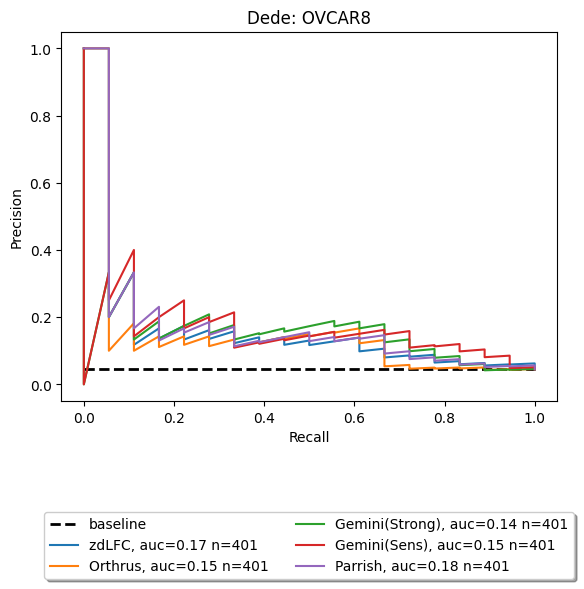

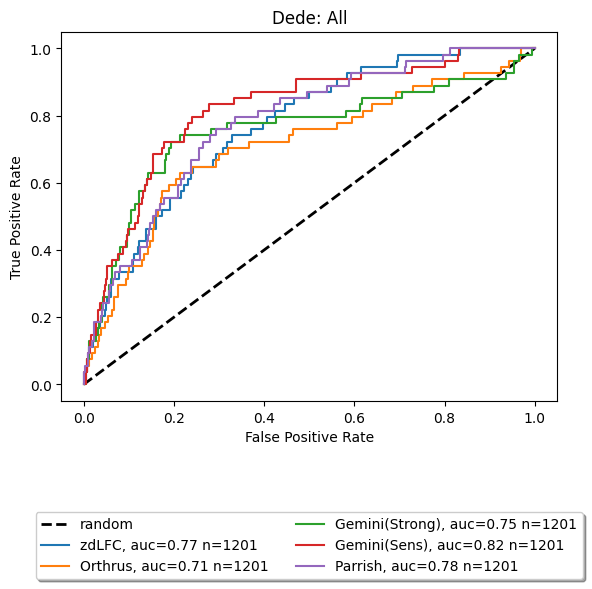

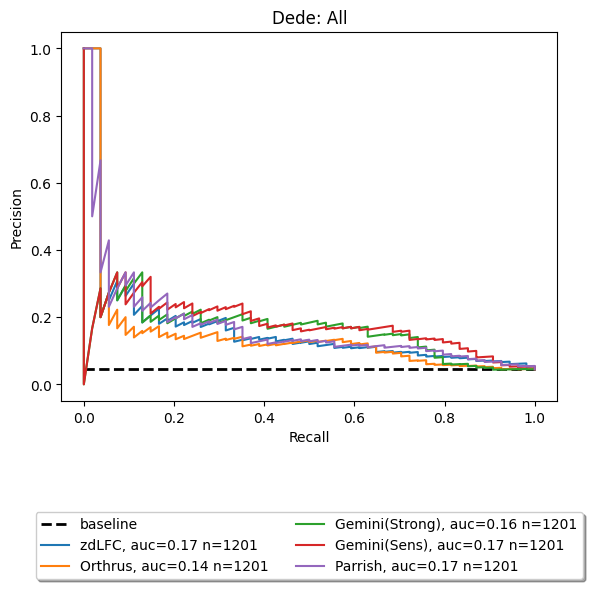

In [20]:
 ##### NOW USE GROUND TRUTH BaCoN  #######

results_Dede_A549_bacon =Cell_Line_Analysis_bacon(Dede_A549, 'A549', 'Dede', scores, bacon)
results_Dede_HT29_bacon =Cell_Line_Analysis_bacon(Dede_HT29, 'HT29', 'Dede', scores, bacon)
results_Dede_OVCAR8_bacon =Cell_Line_Analysis_bacon(Dede_OVCAR8, 'OVCAR8', 'Dede', scores, bacon)

full_list_bacon = [results_Dede_A549_bacon, results_Dede_HT29_bacon,results_Dede_OVCAR8_bacon ]
roc_bacon, pr_bacon = ConvertResultsToDF(full_list_bacon )


roc_bacon.to_csv("Output" + filtered + "/Dede_ROC_Bacon.csv", index=False)
pr_bacon.to_csv("Output" + filtered + "/Dede_PR_Bacon.csv", index=False)


results_Dede_all_Bacon = Cell_Line_Analysis_bacon(dede_all, 'All', 'Dede', scores, bacon)

roc_all_Bacon, pr_all_Bacon = ConvertResultsToDF([results_Dede_all_Bacon] )

roc_all_Bacon.to_csv("Output" + filtered + "/Dede_All_ROC_Bacon.csv", index=False)
pr_all_Bacon.to_csv("Output" + filtered + "/Dede_All_PR_Bacon.csv", index=False)


In [21]:
## Jaccard Similarity for gene pairs
Dede_OVCAR8_ = jaccard_similarity(Dede_OVCAR8, 0.95)
Dede_A549_ = jaccard_similarity(Dede_A549, 0.95)
Dede_HT29_ = jaccard_similarity(Dede_HT29, 0.95)

In [22]:
Dede_OVCAR8_.to_csv("Output" + filtered + "\Comparison\Dede_OVCAR8_Jaccard.csv")
Dede_A549_.to_csv("Output" + filtered + "\Comparison\Dede_A549_Jaccard.csv")
Dede_HT29_.to_csv("Output" + filtered + "\Comparison\Dede_HT29_Jaccard.csv")
Dede_Jaccard = (Dede_OVCAR8_ + Dede_A549_ +Dede_HT29_ ) / 3
Dede_Jaccard.to_csv("Output" + filtered + "\Comparison\Dede_Jaccard.csv")

In [23]:
dede_all.corr(method = "spearman").to_csv("Output" + filtered + "\Comparison\Dede_Correlations.csv")

Best AUROC Method: Parrish
Best AUPR Method: Gemini(Sens)


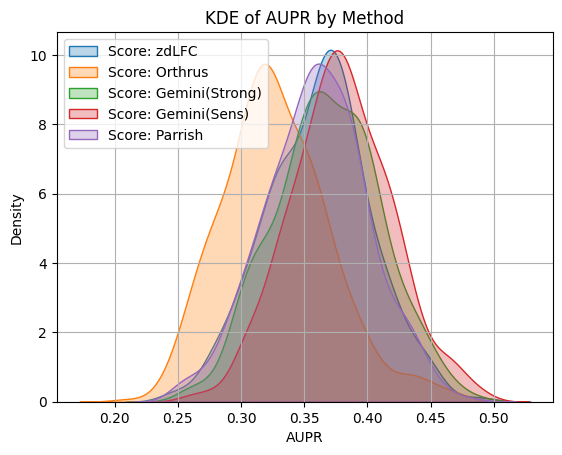

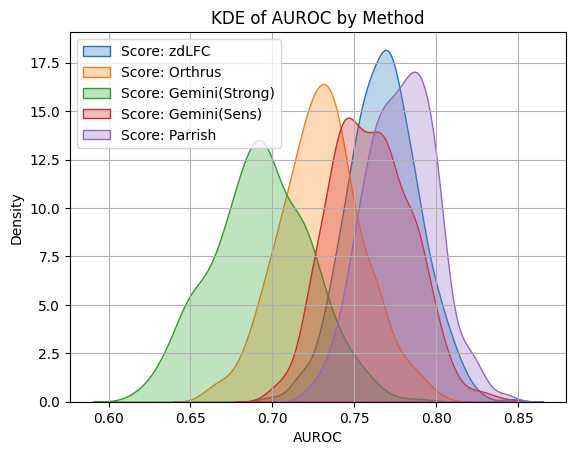

In [26]:
results, aupr_test, auroc_test = Resampling_analysis(dede_all, 'All', 'Dede', scores, ground_truth_depmap_hit, n_repeats=500, frac=0.75)

#display(auroc_test)
#display(aupr_test)


Best AUROC Method: Gemini(Sens)
Best AUPR Method: Gemini(Sens)


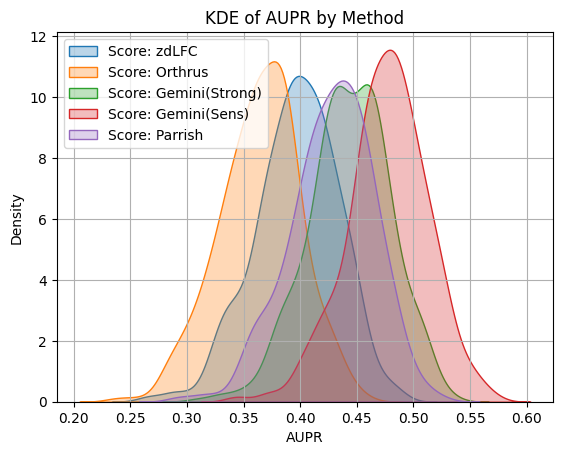

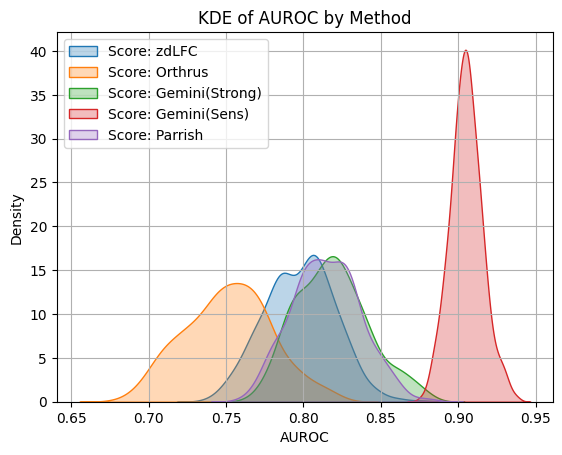

,method,p_value,fdr,bonferroni,significant,signicant_bonferroni
1,Orthrus,0.000000e+00,0.000000e+00,0.000000e+00,True,True
3,zdLFC,0.000000e+00,0.000000e+00,0.000000e+00,True,True
2,Parrish,8.097770e-315,1.079703e-314,3.239108e-314,True,True
0,Gemini(Strong),1.060288e-247,1.060288e-247,4.241154e-247,True,True


,method,p_value,fdr,bonferroni,significant,signicant_bonferroni
0,Gemini(Strong),0.0,0.0,0.0,True,True
1,Orthrus,0.0,0.0,0.0,True,True
2,Parrish,0.0,0.0,0.0,True,True
3,zdLFC,0.0,0.0,0.0,True,True


In [27]:
results, aupr_test, auroc_test = Resampling_analysis(dede_all, 'All', 'Dede', scores, Koferle , n_repeats=500, frac=0.75)
display(aupr_test)
display(auroc_test)